In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
import random

In [16]:
df = pd.read_excel('F://Uni/991/Machine_Learning/ML_HW2/Dataset/2- Regression/regression.xlsx')

In [17]:
#df.head()

In [18]:
xdata = np.array(df)
idx = int(0.7*xdata.shape[0])
x_train = xdata[0:idx,:]
y_train = np.expand_dims(x_train[:,x_train.shape[1]-1],1)
x_train = x_train[:,0:-1]
x_test = xdata[idx:,:]
y_test = np.expand_dims(x_test[:,x_test.shape[1]-1],1)
x_test = x_test[:,0:-1]

In [19]:

def Normalize(n, x):
    norm_x = x
    for i in range(0,n):
        min_x = np.amin(x[:,i])
        max_x = np.amax(x[:,i])
        norm_x[:,i] = (x[:,i] - min_x)/(max_x - min_x)
    return norm_x

In [20]:

def Euclidean(test1, train1):
    distance1 = np.sum(((test1-train1)**2), axis = 1)
    return np.sqrt(distance1)

In [21]:

def ComputeMSE(y, y_pred, m):
    mse = (1/m) * np.sum(np.power(y_pred - y, 2))
    return mse

In [22]:
def get_neighbors(train2, ytrain2, test_row2, k2):
    dist2 = Euclidean(test_row2, train2)
    othery = ytrain2[np.argsort(dist2),0]
    neighbors_y = othery[0:k2]
    return neighbors_y

In [23]:
def predict(train3, ytrain3, test_row3, k3):
    neighbors = get_neighbors(train3, ytrain3, test_row3, k3)
    prediction = np.mean(neighbors)
    return prediction

In [24]:
def KNNRegression(train4, ytrain4, test4, k4):
    prediction1 = np.zeros((test4.shape[0],1))
    for i in range(test4.shape[0]):
        prediction1[i,0] = predict(train4, ytrain4, test4[i,:], k4)
    return prediction1

In [25]:
def FindK(train5, ytrain5, test5, y5):
    mse = list()
    ks = np.arange(1, train5.shape[0], 2)
    for k in ks:
        prediction2 = KNNRegression(train5, ytrain5, test5, k)
        mse.append(ComputeMSE(y5, prediction2, test5.shape[0]))
    plt.plot(np.arange(1, train5.shape[0], 2),mse)
    plt.xlabel('K')
    plt.ylabel('MSE')
    plt.title('K-MSE (Finding the Best K)')
    plt.show()
    index = mse.index(min(mse))
    return ks[index]

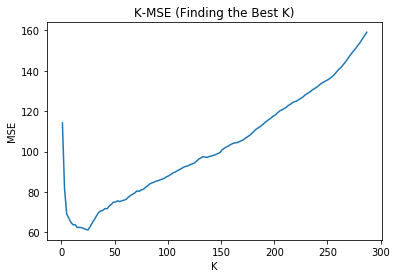

Best K: 25


In [26]:
x_train = Normalize(x_train.shape[1],x_train)
x_test = Normalize(x_test.shape[1],x_test)
k = FindK(x_train, y_train, x_test, y_test)
print("Best K:", k)

In [30]:
prediction1 = KNNRegression(x_train,y_train ,x_test, k)
#print(prediction1)
print("MSE for Test Data: ", ComputeMSE(y_test, prediction1, x_test.shape[0]))

MSE for Test Data:  61.20864960000001


In [31]:
prediction1 = KNNRegression(x_train,y_train ,x_train, k)
#print(prediction1)
print("MSE for Training Data: ", ComputeMSE(y_train, prediction1, x_train.shape[0]))

MSE for Training Data:  70.42133370242215
